In [1]:
from clones.data.experiments import Experiment

%matplotlib inline

# Initialize stack

In [4]:
experiment_path = '../data/clones/yanE833'

# load experiment
experiment = Experiment(experiment_path)

# initialize stack
stack_id = 0
stack = experiment.load_stack(stack_id)
#stack.initialize()

# Segment all layers

In [18]:
for layer in stack:

    # segment layer
    layer.segment(bg='b')

    # save segmentation and measurements
    #layer.save()

# Visualize segmentation

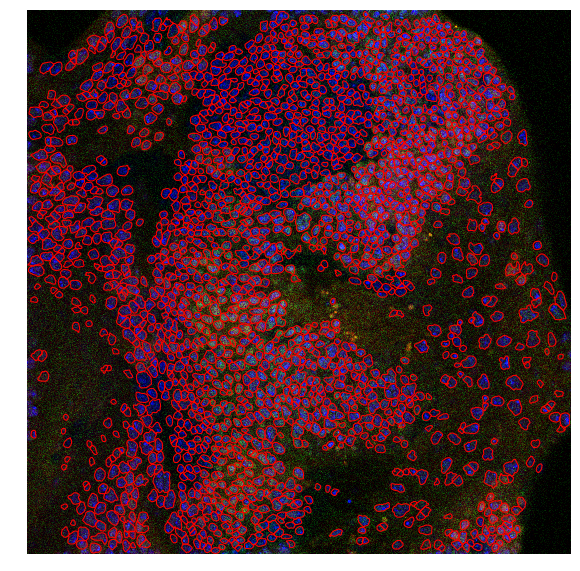

In [5]:
# load layer
layer_id = 0
layer = stack[layer_id]

# visualize segments
fig = layer.show(segments=True)